# Predicting Heart Disease Using Machine Learning


The original source of the dataset is from Kaggle, which combines 5 heart datasets over 11 common features. <br>
However, this project uses a modified version of the dataset<br>
[The original dataset can be found here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/download?datasetVersionNumber=1)


In this learning project, I followed along with notebooks created by Fares Sayah on [Kaggle](https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning), and Karan Bhanot on [Medium](https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c)

### Problem Definition
Given clinical parameters about a patient, can we predict whether or not they have heart disease? 


### Standard Library Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from scipy import stats
import sklearn

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


### Gather & Prepare the Data

In [8]:
heart_disease = pd.read_csv("heart-disease.csv")

In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Dictionary 

0. **age** (age in years)
<br>
1. **sex** (1 = male; 0 = female)
<br>
2. **cp** (chest pain, based on scale of 0-3)
    - 0: Typical angina
    - 1: Atypical angina (chest pain not related to heart)
    - 2: Non-anginal pain (usually esophageal spasms)
    - 3: Asymptomatic (chest pain with no signs of disease)<br>
<br>
3. **trestbps** (resting systolic blood pressure, in mmHg)
<br>
4. **chol** (serum cholesterol in mg/dL)
<br>
5. **fbs** (fasting blood sugar; 0 = less than or equal to 126 mg/dL; 1 > 126 mg/dL)
<br>
6. **restecg** (resting ECG)
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
    - 2: Possible or definite left ventricular hypertrophy <br>
<br>
    
7. **thalach** (maximum heart rate acheived on stress test, between 60-202)
<br>
8. **exang** (exercise induced angina; 1 = yes; 0 = no)
<br>
9. **oldpeak** (amount of ST depression induced by exercise)
<br>
10. **slope** (slope of the peak exercise ST segment)
    - 0: Upsloping
    - 1: Flatsloping
    - 2: Downsloping <br>
<br>
11. **ca** (number of major vessels colored by flouroscopy, 0-3)
<br>
12. **thal** (thalium stress test)
    - 1-3: normal
    - 6: fixed defect
    - 7: reversible defect (no blood flow during exercise) <br>
<br>

13. **target** (have heart disease = 1; no heart disease = 0)

In [9]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis (EDA)

- What questions am I trying to solve? 
- What kind of data do I have, and how do I work with it? 
- What's missing from the data, and how to deal with it? 
- Where are the outliers and why are they important? 
- How can I add, change, or remove features to get more out of the data? 

In [10]:
heart_disease.shape

(303, 14)

In [11]:
pd.set_option("display.float", "{:.2f}".format)
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [88]:
# Check value counts of target (heart disease or not)

counts = heart_disease.target.value_counts()
counts

1    165
0    138
Name: target, dtype: int64

In [18]:
# Display value counts (1 = has heart disease, 0 = no heart disease)

heart_disease.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (target)

In [19]:
# Check for missing values

heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Notes: 

- Looks like there are 165 people with heart disease, and 138 without, so the dataset is fairly balanced

- There are no null values

In [22]:
# Create separate lists of categorical and continuous values

categorical_val = []
continuous_val = []

for column in heart_disease.columns: 
    if len(heart_disease[column].unique()) <= 10:
        categorical_val.append(column)
    else: 
        continuous_val.append(column)
        

In [23]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
# Graphing heart disease by sex

have_disease = heart_disease.loc[heart_disease['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4)

no_disease = heart_disease.loc[heart_disease['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [28]:
# Graphing heart disease by chest pain 

have_disease = heart_disease.loc[heart_disease['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

no_disease = heart_disease.loc[heart_disease['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

### Histograms of Continuous Data

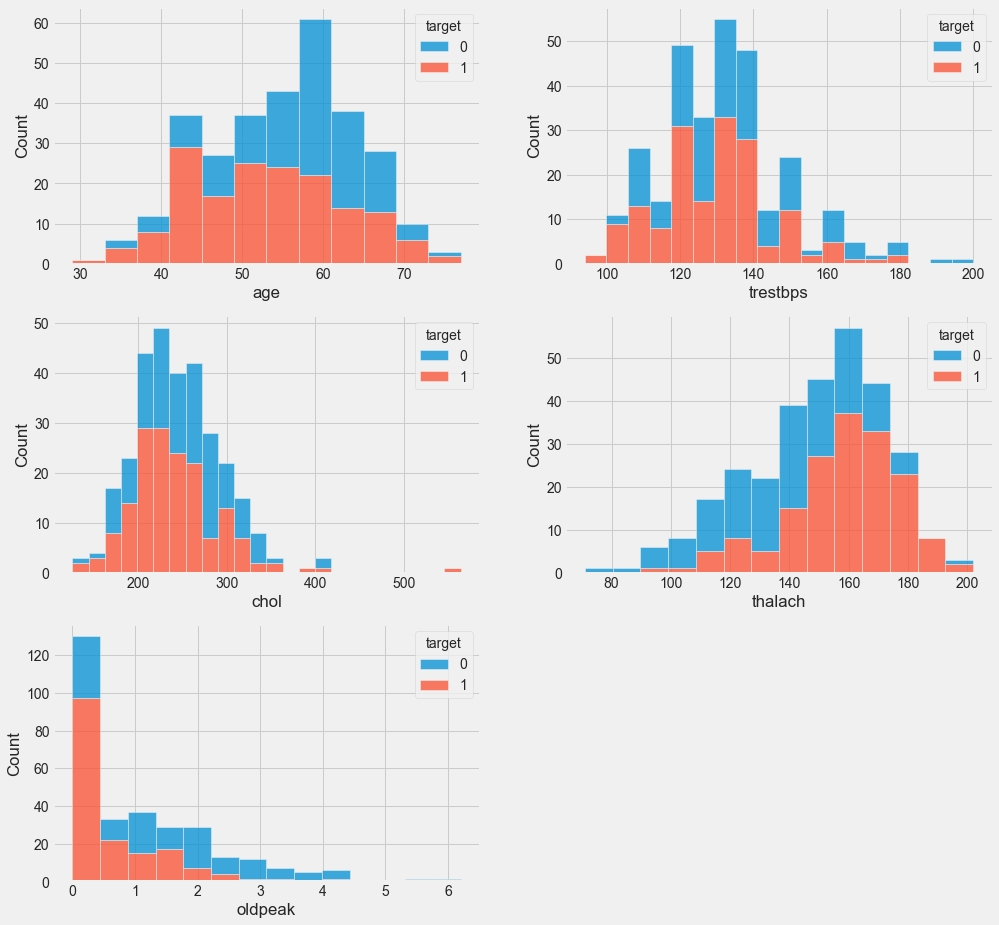

In [85]:
# Create Histograms of Continuous Data

plt.figure(figsize=(15,15))

for i, column in enumerate(continuous_val, 1): 
    plt.subplot(3,2,i)
    
    sns.histplot(data=heart_disease, x=column, hue="target", multiple="stack")


- **trestbps** : resting blood pressure
- **chol** : serum cholesterol (mg/dL)
- **thalach** : maximum heart rate acheived on stress test (60-202)
- **oldpeak** : ST depression induced by exercise relative to rest

Target: 
- 0 (blue) = no heart disease
- 1 (orange) = heart disease

### Scatterplot of Heart Disease in Relation to Age and Cholesterol

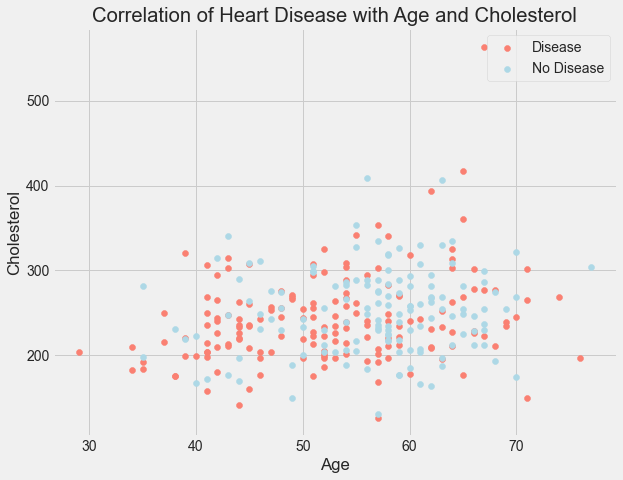

In [38]:
# Scatterplot of age, cholesterol, and heart disease

plt.figure(figsize=(9,7))

plt.scatter(heart_disease.age[heart_disease.target == 1],
           heart_disease.chol[heart_disease.target == 1],
           c="salmon")

plt.scatter(heart_disease.age[heart_disease.target == 0],
           heart_disease.chol[heart_disease.target == 0],
           c="lightblue")

plt.title("Correlation of Heart Disease with Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(["Disease", "No Disease"]); 


## Note: 
There is no obvious correlation between cholesterol levels and heart disease! 

## Correlation Matrix

(14.5, -0.5)

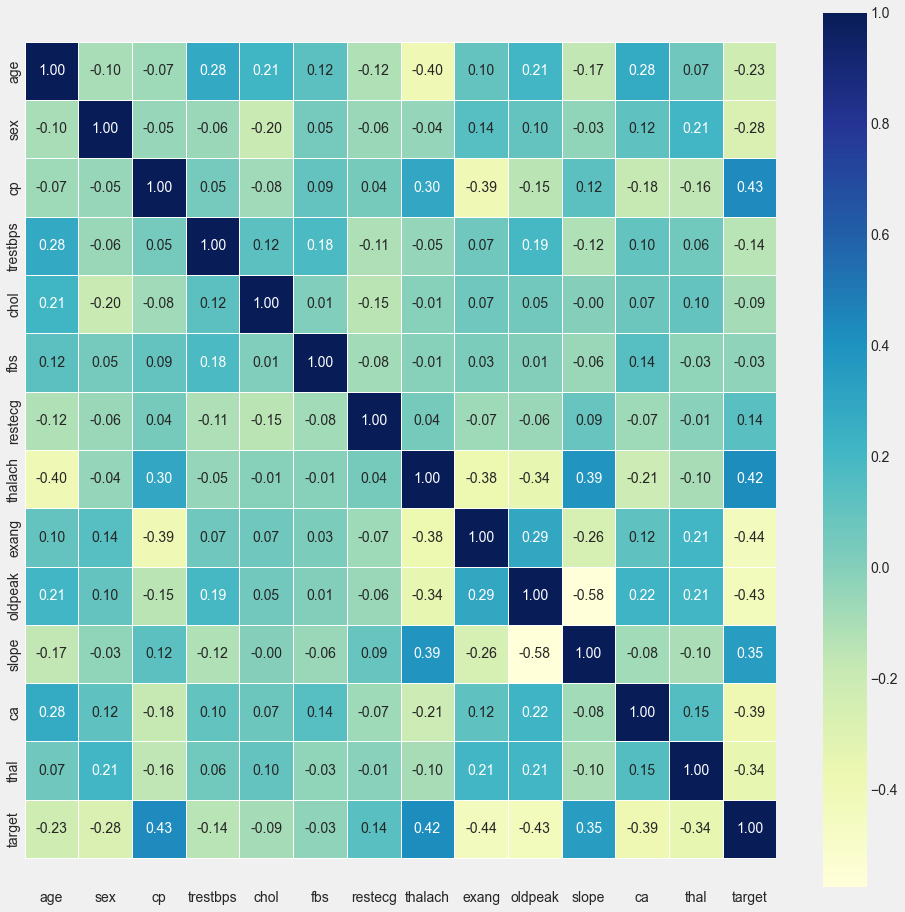

In [39]:
corr_matrix = heart_disease.corr()

fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(corr_matrix, 
                 annot = True, 
                 linewidths = 0.5, 
                 fmt = ".2f", 
                 cmap = "YlGnBu"); 

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)


### Note: 
The presence of chest pain and thalach (highest pulse rate acheived on stress test) seem to have the highest correlations with the target value. 

In [40]:
heart_disease.drop('target', axis=1).corrwith(heart_disease.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

Note: fasting blood sugar and cholesterol have the lowest correlation with the target variable

# Data Processing

Steps: 
- Convert categorical values to dummy variables
- Scale them 

In [41]:
categorical_val.remove('target')
dataset = pd.get_dummies(heart_disease, columns = categorical_val)

In [42]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [43]:
print(heart_disease.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [44]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [45]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Build Models

### Create Classification Report Template

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Split Data into Train and Test Data

In [47]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now that the data is split into training and test sets, I can build machine learning models

**Train** the data on the training set

**Test** on the test set 

Here, I'll try 5 different machine learning models: 

- Logistic Regression
- K-Nearest Neighbors Classifier
- Support Vector machine
- Decision Tree Classifier
- Random Forest Classifier


## Logistic Regression 

In [65]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [66]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81


## K-nearest Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.86   0.87      0.87       0.87          0.87
recall     0.85   0.89      0.87       0.87          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.85  0.88      0.87       0.87          0.87
recall     0.85  0.88      0.87       0.87          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [68]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/var/folders/zf/lkbvth491cgdwdl36_qr9wdr0000gn/T/ipykernel_45413/1715872608.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,K-nearest neighbors,86.79,86.81


## Support Vector Machine

In [69]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.94   0.93      0.93       0.93          0.93
recall     0.92   0.95      0.93       0.93          0.93
f1-score   0.93   0.94      0.93       0.93          0.93
support   97.00 115.00      0.93     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.86  0.90      0.88       0.88          0.88
recall     0.88  0.88      0.88       0.88          0.88
f1-score   0.87  0.89      0.88       0.88          0.88
support   41.00 50.00      0.88      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



In [70]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/var/folders/zf/lkbvth491cgdwdl36_qr9wdr0000gn/T/ipykernel_45413/446375890.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,K-nearest neighbors,86.79,86.81
2,Support Vector Machine,93.40,87.91


## Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.84      0.78       0.78          0.79
recall     0.83  0.74      0.78       0.78          0.78
f1-score   0.77  0.79      0.78       0.78          0.78
support   41.00 50.00      0.78      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



In [72]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/var/folders/zf/lkbvth491cgdwdl36_qr9wdr0000gn/T/ipykernel_45413/490717132.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,K-nearest neighbors,86.79,86.81
2,Support Vector Machine,93.40,87.91
3,Decision Tree Classifier,100.00,78.02


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.80  0.84      0.82       0.82          0.82
recall     0.80  0.84      0.82       0.82          0.82
f1-score   0.80  0.84      0.82       0.82          0.82
support   41.00 50.00      0.82      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



In [74]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

/var/folders/zf/lkbvth491cgdwdl36_qr9wdr0000gn/T/ipykernel_45413/2869621319.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
1,K-nearest neighbors,86.79,86.81
2,Support Vector Machine,93.40,87.91
3,Decision Tree Classifier,100.00,78.02
4,Random Forest Classifier,100.00,82.42


# Conclusions

The next step would be to explore hyperparameter tunings for the various ML models

From the preliminary data, though, it seems that Logistic Regression and Support Vector Machine models give the highest % testing accuracy, predicting heart disease from the features with a > 86% accuracy.  